In [2]:
import wget
#!wget http://data.phishtank.com/data/online-valid.csv

--2024-04-06 14:40:11--  http://data.phishtank.com/data/online-valid.csv
Resolving data.phishtank.com (data.phishtank.com)... 104.17.177.85, 104.16.101.75
Connecting to data.phishtank.com (data.phishtank.com)|104.17.177.85|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.phishtank.com/data/online-valid.csv [following]
--2024-04-06 14:40:11--  https://data.phishtank.com/data/online-valid.csv
Connecting to data.phishtank.com (data.phishtank.com)|104.17.177.85|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1712394622&Signature=ub3tDnmT93bDAAfvfRQHIJJcUoWNrqjJQOiYzvIz2PHqfsjcCzLPyuhAG8~DkRwirdWUzGpyvocrY55H0r4FwyaUpws03xn2WFL67GjR6zwXhi4ofzWPwnFRSQuPowsPZjYK7GmGEmhokjAbjo0~SttgMBGw4obE6OfmISjowMRFc-MWkuNz6NW5x7PlK1SwyWCmjEn2OeHx9js1zwb8Fbvjyxr~JYuVdxx-IT9psLtmTI0b8-DdztHLf2Zycwy59WCtnJK7iRSvjS29TbiMZZSm7GPVQWYixf~-JZoFBnkipnnLpHHMh2EWt7WRgKpq

In [4]:
#importing required packages for this module
import pandas as pd
from urllib.parse import urlparse,urlencode
import ipaddress
import re

from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [5]:
# data0 = phishing url
data0 = pd.read_csv("online-valid.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8524259,http://tradeskincs.com,http://www.phishtank.com/phish_detail.php?phis...,2024-04-06T08:06:04+00:00,yes,2024-04-06T08:09:51+00:00,yes,Steam
1,8524260,https://tradeskincs.com/,http://www.phishtank.com/phish_detail.php?phis...,2024-04-06T08:06:04+00:00,yes,2024-04-06T08:09:51+00:00,yes,Steam
2,8524258,http://valemota.com.br/hf2be649befbdab56fd97e8...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-06T07:46:33+00:00,yes,2024-04-06T07:56:40+00:00,yes,Other
3,8524248,https://encrypt2.ink/s1-oevlogin/,http://www.phishtank.com/phish_detail.php?phis...,2024-04-06T06:33:32+00:00,yes,2024-04-06T06:52:47+00:00,yes,Other
4,8524247,https://cff.kservol.be/,http://www.phishtank.com/phish_detail.php?phis...,2024-04-06T06:33:17+00:00,yes,2024-04-06T06:52:47+00:00,yes,Other


In [7]:
data0.shape

(58073, 8)

In [ ]:
#Collecting 5,000 Phishing URLs randomly
phishurl = data0.sample(n = 5000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

In [9]:
phishurl.shape

(5000, 8)

In [10]:
data1=pd.read_csv("phish.csv")
data1.columns =['url','type']
data1_new = data1[data1['type'] == 'benign']
data1_new.head()

# legiurl is legitimate url
legiurl = data1_new.sample(n = 5000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,url,type
0,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,benign
1,buildingtuneup.com/index.php?fmv=rs,benign
2,http://emgn.com/entertainment/these-29-beautif...,benign
3,encous.com/,benign
4,http://torcache.net/torrent/54EF8F667CC5F0C273...,benign


In [13]:
legiurl.shape

(5000, 2)

In [ ]:
# MAKING FUNCTIONS WHICH EXTRACTS FEATURES OF OUR URL.

In [14]:
# 1.Domain of the URL (Domain)
def getDomain(url):
    domain = urlparse(url).netloc
    if re.match(r"^www.",domain):
        domain = domain.replace("www.","")
    return domain

In [15]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
    try:
        ipaddress.ip_address(url)
        ip = 1
    except:
        ip = 0
    return ip

In [16]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
    if "@" in url:
        at = 1
    else:
        at = 0
    return at

In [36]:
 #4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
    if len(url) < 54:
        length = 0
    else:
        length = 1
    return length

In [17]:
# 5.Gives number of '/' in URL (URL_Depth) this code calculates the depth of a
# URL path by counting the number of non-empty segments separated by '/' characters.
def getDepth(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth = depth+1
    return depth

In [18]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
    pos = url.rfind('//')
    if pos > 6:
        if pos > 7:
            return 1
        else:
            return 0
    else:
        return 0

In [19]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
    domain = urlparse(url).netloc
    if 'https' in domain:
        return 1
    else:
        return 0

In [20]:

#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [21]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [22]:

# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

In [23]:
!pip install python-whois

  Obtaining dependency information for python-whois from https://files.pythonhosted.org/packages/59/03/9f051f0c296dacb7770827b2ef421134fda551ee6e2e2ee7955ee4cc4f3a/python_whois-0.9.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 1.5 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [24]:

import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [82]:

# 12.Web traffic (Web_Traffic)
def web_traffic(url):
    try:
        #Filling the whitespaces in the URL if any
        url = urllib.parse.quote(url)
        rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
            "REACH")['RANK']
        rank = int(rank)
    except TypeError:
        return 1
    if rank <100000:
        return 1
    else:
        return 0

In [83]:

# 13.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
        try:
            creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if ((expiration_date is None) or (creation_date is None)):
        return 1
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return 1
    else:
        ageofdomain = abs((expiration_date - creation_date).days)
        if ((ageofdomain/30) < 6):
            age = 1
        else:
            age = 0
    return age

In [84]:

# 14.End time of domain: The difference between termination time and current time (Domain_End) 
def domainEnd(domain_name):
    expiration_date = domain_name.expiration_date
    if isinstance(expiration_date,str):
        try:
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if (expiration_date is None):
        return 1
    elif (type(expiration_date) is list):
        return 1
    else:
        today = datetime.now()
        end = abs((expiration_date - today).days)
        if ((end/30) < 6):
            end = 0
        else:
            end = 1
    return end

In [28]:
# importing required packages for this section
import requests

In [226]:
#Function to extract features
def featureExtraction(url,label):

    features = []
    #Address bar based features 9)
    features.append(getDomain(url))
    features.append(havingIP(url))
    features.append(haveAtSign(url))
    features.append(getLength(url))
    features.append(getDepth(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(prefixSuffix(url))

    #Domain based features (4)
    dns = 0
    try:
        domain_name = whois.whois(urlparse(url).netloc)
    except:
        dns = 1

    features.append(dns)
   # features.append(web_traffic(url))
    features.append(1 if dns == 1 else domainAge(domain_name))
  #  features.append(1 if dns == 1 else domainEnd(domain_name))
    features.append(label)


    return features

In [227]:
#Extracting the feautres & storing them in a list
legi_features = []
label = 0

for i in range(0, 5000):
    print(url)
    url = legiurl['url'][i]
    legi_features.append(featureExtraction(url,label))
    


https://ymail-102329.weeblysite.com/
'9d345009-a-62cb3a1a-s-sites.googlegroups.com/site/stickamcomlogindo/login.html?amp\%3Battredirects=1&amp;attachauth=ANoY7crGmSBWLF2uF3G0xK6YE5FMdTIoO1KDRWjYd95KH3Bd3usPbSr3tQRpjdnn6OWH4UIR95ugJJvFu63CSpJpQyPNbniS-B-GurplUntm1EqnxWgPLn_5WjGjnikdXmPJR7D4MWvRhStmynFgyJb9QzEIi_meQtMKW4nZuh_QN66a9BwQXAzk7v9VlrnqAp0qVNb-_JBXEYYpWpCGhkWD2w5NWf4GDg\%3D\%3D&amp;attredirects=0'
buildingtuneup.com/index.php?fmv=rs
http://emgn.com/entertainment/these-29-beautiful-photos-will-inspire-you-to-travel-the-world/
encous.com/
http://torcache.net/torrent/54EF8F667CC5F0C273E91C19F90FA92FA82C625C.torrent?title=[kickass.to]android.only.paid.0.day.17th.may.2014
fanpix.net/gallery/elliott-gould-pictures.htm
ascarz.com/81dc9bdb52d04dc20036dbd8313ed07d0/secure.paypal.com/81dc9bdb52d04dc20036dbd8313ed055/cgi-bin/en/account/login/index.php
oppapers.com/subjects/pierre-bonnard-page4.html
scholarship.rice.edu/jsp/xml/1911/21866/1/m001.tei.html
ok.ppok.asia/login/en/index.htm
dre

In [228]:
#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                 'Domain_Age','label' ]

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.shape

(5000, 12)

In [229]:
# Storing the extracted legitimate URLs fatures to csv file
legitimate.to_csv('legitimate.csv', index= False)
legitimate.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,label
4995,,0,0,0,3,0,0,0,0,1,1,0
4996,,0,0,0,2,0,0,0,0,1,1,0
4997,,0,0,1,2,0,0,0,0,1,1,0
4998,,0,0,0,3,0,0,0,0,1,1,0
4999,,0,0,0,4,0,0,0,0,1,1,0


In [ ]:
# Now, feature extraction is performed on phishing URLs.



In [134]:
phishurl.shape

(5000, 8)

In [256]:

#Extracting the feautres & storing them in a list
phish_features = []
label = 1
for i in range(0, 5000):
    url = phishurl['url'][i]
    phish_features.append(featureExtraction(url,label))

In [257]:
print(phish_features)

[['72144728126491224-gsjgnmtikptk.start.page', 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], ['8ced.orzw.workers.dev', 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], ['ipfs.io', 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1], ['helpid99473957184918596281444.firebaseapp.com', 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], ['cloudflare-ipfs.com', 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1], ['cloudflare-ipfs.com', 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1], ['ansmkiuerjuiasnjfuiry348759wahsnj78843kmlsdkijye2.pages.dev', 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], ['baov-b4d1b.firebaseapp.com', 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], ['ipfs.eth.aragon.network', 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1], ['t.co', 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], ['bafybeiamokwi7oluik6xpwt6ovnwtftwrohno27rqqakrs5rdxxwkgrfg4.ipfs.cf-ipfs.com', 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], ['mliezwqkgd.duckdns.org', 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], ['3rdstreetmarket.com', 0, 0, 1, 4, 0, 0, 1, 0, 1, 1, 1], ['docs.google.com', 0, 0, 1, 5, 0, 0, 0, 0, 1, 1, 1], ['rp.mockplus.com', 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 1], ['d

In [259]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                 'Domain_Age','label' ]

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,label
0,72144728126491224-gsjgnmtikptk.start.page,0,0,0,0,0,0,0,1,1,1,1
1,8ced.orzw.workers.dev,0,0,0,0,0,0,0,0,1,1,1
2,ipfs.io,0,0,1,2,0,0,0,0,1,1,1
3,helpid99473957184918596281444.firebaseapp.com,0,0,1,0,0,0,0,0,1,1,1
4,cloudflare-ipfs.com,0,0,1,2,0,0,0,1,1,1,1


In [260]:

# Storing the extracted legitimate URLs fatures to csv file
phishing.to_csv('phishing.csv', index= False)

In [261]:
#FINAL DATA SET, In the above section we formed two dataframes of legitimate & phishing URL features. Now, we will combine them to a single dataframe and export the data to csv file for the Machine Learning training done in other notebook.

In [262]:
#Concatenating the dataframes into one 
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,label
0,,0,0,1,4,0,0,0,0,1,1,0
1,,0,0,0,2,0,0,0,0,1,1,0
2,emgn.com,0,0,1,2,0,0,0,0,1,1,0
3,,0,0,0,1,0,0,0,0,1,1,0
4,torcache.net,0,0,1,2,0,0,0,0,1,1,0


In [263]:

urldata.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,label
9995,atbu.edu.ng,0,0,1,7,0,0,0,0,1,1,1
9996,docs.google.com,0,0,1,5,0,0,0,0,1,1,1
9997,43.156.7.24,0,0,1,3,1,0,0,0,1,1,1
9998,cloosud-776c.lnskeaysldoavar.workers.dev,0,0,0,0,0,0,0,1,1,1,1
9999,ymail-102329.weeblysite.com,0,0,0,0,0,0,0,1,1,1,1


In [264]:
urldata.shape

(10000, 12)

In [265]:

# Storing the data in CSV file
urldata.to_csv('urldata.csv', index=False)

In [266]:
#With this the objective of this notebook is achieved. We finally extracted 18 features for 10,000 URL which has 5000 phishing & 5000 legitimate URLs.

In [267]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [268]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,label
0,NaN,0,0,1,4,0,0,0,0,1,1,0
1,NaN,0,0,0,2,0,0,0,0,1,1,0
2,emgn.com,0,0,1,2,0,0,0,0,1,1,0
3,NaN,0,0,0,1,0,0,0,0,1,1,0
4,torcache.net,0,0,1,2,0,0,0,0,1,1,0


In [269]:
#Checking the shape of the dataset
data0.shape

(10000, 12)

In [270]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'label'],
      dtype='object')

In [271]:
#Information about the dataset
#data0.info()
data0.describe().T
#data0.head()

,count,mean,std,min,25%,50%,75%,max
Have_IP,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
Have_At,10000.0,0.0082,0.090186,0.0,0.0,0.0,0.0,1.0
URL_Length,10000.0,0.4078,0.491450,0.0,0.0,0.0,1.0,1.0
URL_Depth,10000.0,2.1575,1.838541,0.0,1.0,2.0,3.0,16.0
Redirection,10000.0,0.0075,0.086281,0.0,0.0,0.0,0.0,1.0
https_Domain,10000.0,0.0003,0.017319,0.0,0.0,0.0,0.0,1.0
TinyURL,10000.0,0.0604,0.238238,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,10000.0,0.2062,0.404596,0.0,0.0,0.0,0.0,1.0
DNS_Record,10000.0,1.0000,0.000000,1.0,1.0,1.0,1.0,1.0
Domain_Age,10000.0,1.0000,0.000000,1.0,1.0,1.0,1.0,1.0


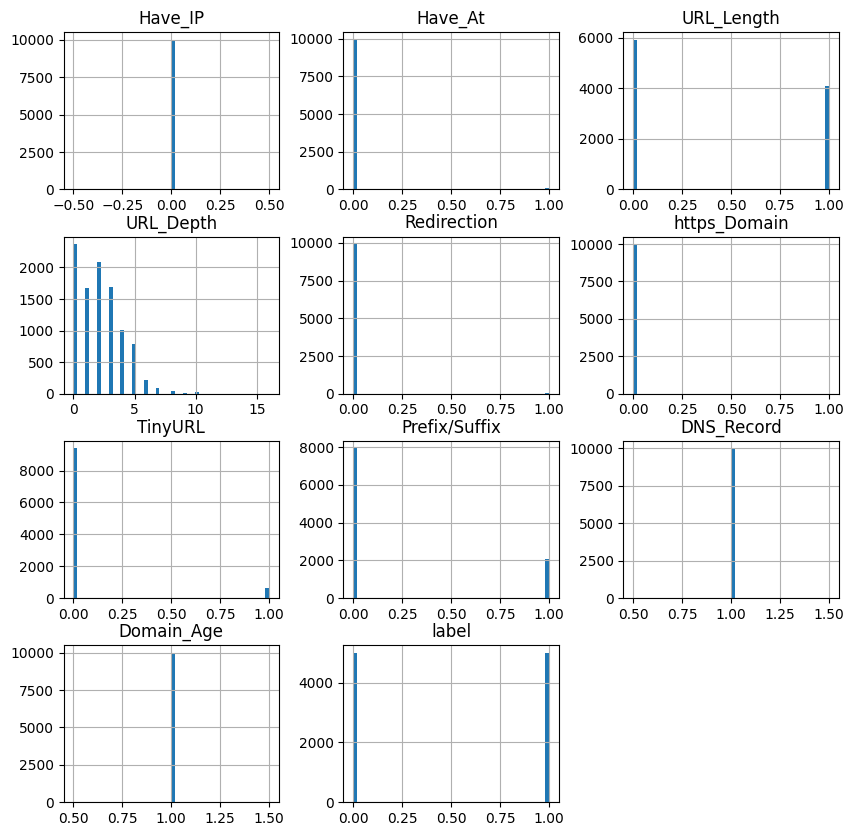

In [272]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (10,10))
plt.show()

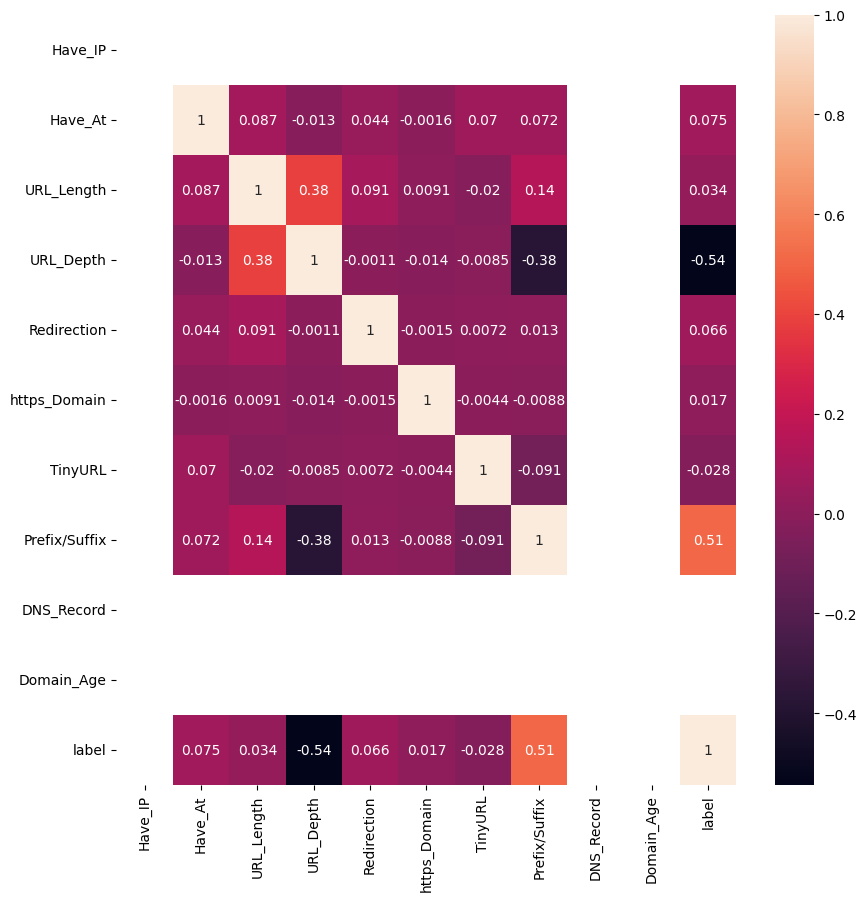

In [273]:
#Correlation heatmap
#d=data0.drop(columns=['Domain'])
data = data0.drop(['Domain'], axis = 1).copy()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [274]:
data0.describe()
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Domain_Age       0
label            0
dtype: int64

In [275]:

# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,label
0,0,0,1,1,0,0,0,1,1,1,1
1,0,0,1,2,0,0,0,0,1,1,0
2,0,0,0,4,0,0,0,0,1,1,0
3,0,0,1,5,0,0,0,0,1,1,1
4,0,0,0,6,0,0,0,0,1,1,0


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['label']
X = data.drop('label',axis=1)
X.shape, y.shape

In [278]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

In [279]:

from sklearn.metrics import accuracy_score
     

In [280]:

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

In [281]:

# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [282]:

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [283]:

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.842
Decision Tree: Accuracy on test Data: 0.841


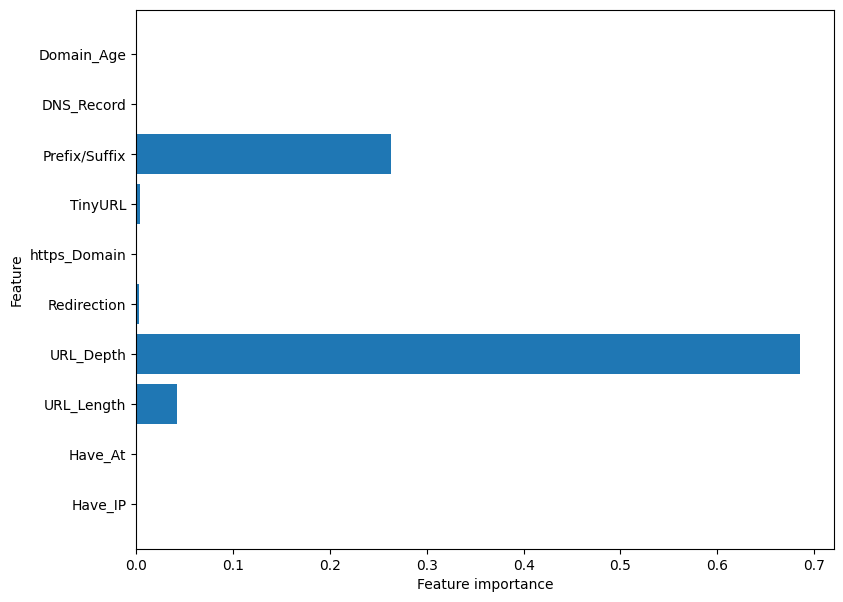

In [284]:

#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [285]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [287]:
import pickle

# dump information to that file
pickle.dump(tree, open('model.pkl', 'wb'))